In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Loading all the 3  datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows of each dataset
print("\nCustomers Dataset:")
print(customers.head())
print(customers.info())

print("\nProducts Dataset:")
print(products.head())
print(products.info())

print("\nTransactions Dataset:")
print(transactions.head())
print(transactions.info())




Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving

In [17]:
# Check for missing values in each dataset
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary Statistics - Customers Dataset:")
print(customers.describe(include='all'))

print("\nSummary Statistics - Products Dataset:")
print(products.describe(include='all'))

print("\nSummary Statistics - Transactions Dataset:")
print(transactions.describe())



Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Summary Statistics - Customers Dataset:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

Summary Statistics - Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66 

Data Summary

- Customers: 200 unique customers with no missing values.
- Most customers are from South America.
- Customer signup dates are spread across a two-year period.
- Products: 100 unique products with no missing values.
- Price distribution ranges from 16.08 to 497.76.
- Products are categorized into Books, Electronics, Clothing, and Home Decor.
- Transactions: 1000 transactions with no missing values.
- Average transaction value is 689.99, with a standard deviation of 493.14.
- Average quantity per transaction is 2.54.

Key Observations

- Customer Concentration: South America has the highest customer concentration.
- Price Variation: Product prices show significant variation across categories.
- Transaction Frequency: Analysis of transaction dates and customer IDs can reveal purchase patterns and customer loyalty.
- Further Analysis
- Customer Segmentation: Segment customers based on RFM analysis or demographics to identify high-value customers.
- Product Performance: Analyze product sales, profitability, and popularity to optimize inventory and pricing.
- Customer Behavior: Investigate customer purchase history, including frequency, recency, and product preferences.

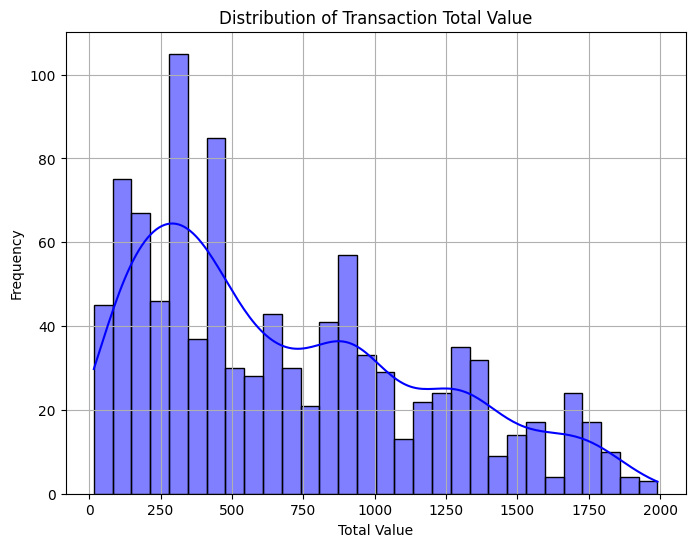

In [22]:
# Plot distributions of numeric data
plt.figure(figsize=(8, 6))
sns.histplot(transactions['TotalValue'], kde=True, bins=30, color='blue')
plt.title('Distribution of Transaction Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')

plt.grid()
plt.show()


Business Insights of Transactional total value:

- The distribution  is very skewed, with a majority  the lower range (below $500). This indicates a  reliance on low-value purchases as the most frequent.

- With a large volume of low-value transactions,improving customer relations and promoting a large amount of  bundling products  may make customers increase their spending per transaction.

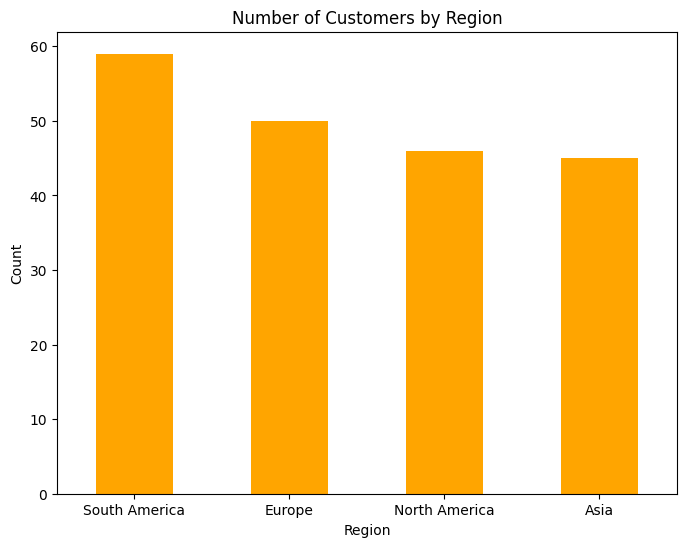

In [23]:
# Count of customers by region

plt.figure(figsize=(8, 6))
customers['Region'].value_counts().plot(kind='bar', color='orange')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()

Regional Analysis of Transaction Total Value:

- South America has the highest number of customers compared to other regions, indicating a strong market presence or customer base in this area. This is good for a balanced potential for growth across these regions.

- European regions have slightly higher numbers of customers compared to north America and Asia

- Asian and North American regions signify implementation of a unique approach to diffrent from South America and Europe

- Customized efforts in Europe, North America, and Asia may address their unique needs

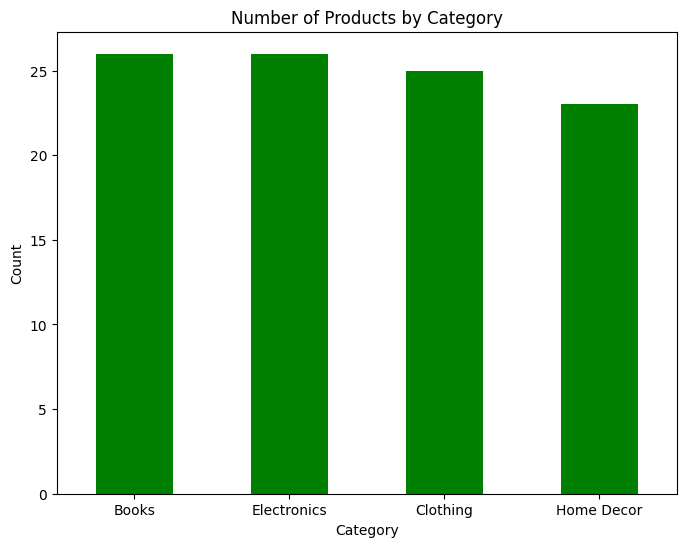

In [26]:
# Count of products by category
plt.figure(figsize=(8, 6))
products['Category'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()

Categorical Analysis of differnt Products :

- Electronics and books appear to have the highest product counts, indicating a potential area of strength.

- Home Decor has the lowest product count which needs a potential opportunity for expansion.

- Tailored marketing campaigns could be designed for clothing and Decor to Boost in Productivity.

- Electronics and Books have high demand due to its entertainment/information value. Clothing and Home decor are seasonal items suggesting seasonal products that attract customers.

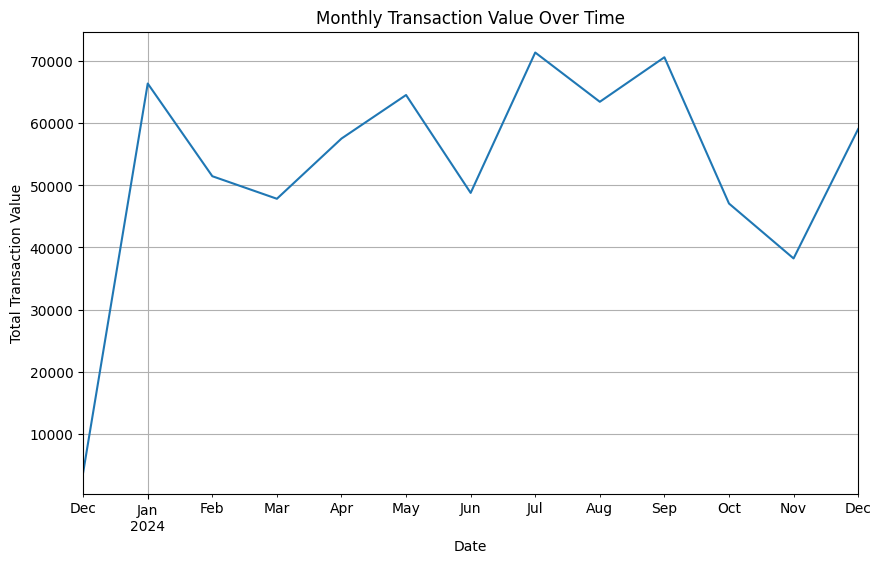

In [21]:
# Time-series analysis of transactions
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')  # Extract month period
transactions_by_date = transactions.groupby('Month')[['TotalValue']].sum()  # Aggregate only 'TotalValue'

plt.figure(figsize=(10, 6))
transactions_by_date['TotalValue'].plot()
plt.title('Monthly Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Value')
plt.grid()
plt.show()


Analysis of Monthly Transaction Value Over Time:

- the chart shows a varing pattern in monthly transaction value over the year. There are periods of growth and decline, with a  peak in July and september.

- A significant spike in transaction value is observed in January. This could be attributed to factors like seasonal sales, holidays, or new product launches.

- The company needs to investigate the reasons behind the decline in October and take corrective measures. This could involve analyzing competitor activity, adjusting marketing strategies, or improving customer service.

- The company should leverage the January surge by planning promotions, offering discounts, or introducing new products to capitalize on the increased consumer activity.